## Exploratory data analysis


### Graphical Exploration

#### IMPORTING DATA

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = sns.load_dataset('titanic')

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### HISTOGRAM

C:\Users\Ashwin\Miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ashwin\Miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Age Distribution')

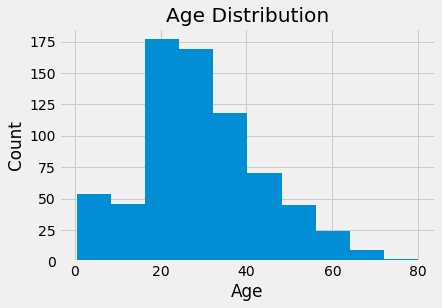

In [72]:
plt.style.use('fivethirtyeight')
_=plt.hist(df['age'],    bins = 10)
__ = plt.xlabel('Age')
___ = plt.ylabel('Count')
plt.title('Age Distribution')


#### PMF

In [56]:
age = df['age'].dropna()
pmf = age.value_counts().sort_index() / len(age)

<BarContainer object of 63 artists>

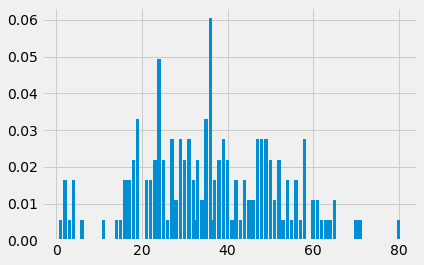

In [59]:
plt.bar(pmf.index , pmf)

<b> Comparision </b>

In [63]:
men_age = df[df['who']=='man'].age
pmf_men = men_age.value_counts().sort_index() / len(men_age)
women_age = df[df['who']=='woman'].age
pmf_women = women_age.value_counts().sort_index() / len(women_age)
children_age = df[df['who']=='child'].age
pmf_children = children_age.value_counts().sort_index() / len(children_age)

<BarContainer object of 9 artists>

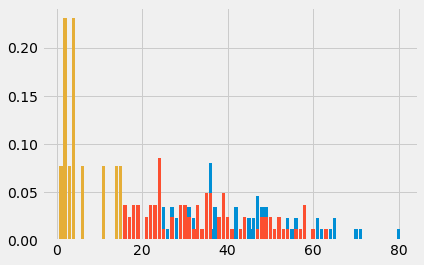

In [66]:
plt.bar(pmf_men.index ,pmf_men)
plt.bar(pmf_women.index ,pmf_women)
plt.bar(pmf_children.index ,pmf_children)

C:\Users\Ashwin\Miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ashwin\Miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


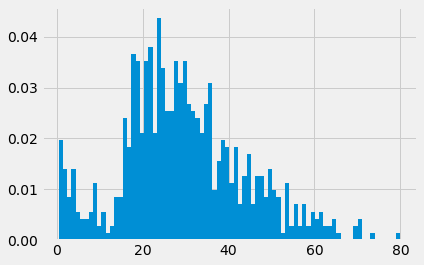

In [145]:
_=plt.hist(df['age'],    bins = int(df['age'].max()), density=True)

#### BEE SWARM PLOT

<b>Binning Bias:</b> Different Data interpretation for different Bin size.                                                 Thus, use Bee Swarm Plot to eliminate binning bias


C:\Users\Ashwin\Miniconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Ashwin\Miniconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


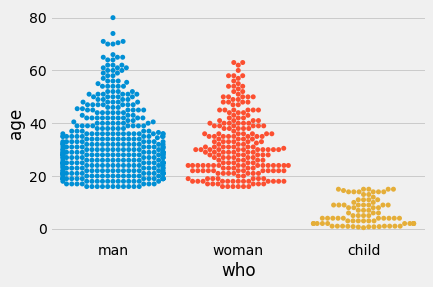

In [359]:
plt.style.use('fivethirtyeight')
sns.swarmplot(x='who',y='age', data=df)


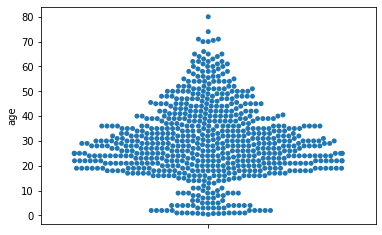

In [40]:
sns.swarmplot(y='age', data=df)

#### ECDF   - Empirical Cumulative Distribution


|PMF|CDF|
|:--:|:--:|
|Probability that we will get exactly x|Probability that we get a value <= x|


In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

In [37]:
df = df.dropna()

In [38]:
X_man = np.sort(df[df['who']=='man'].age)
X_man = [x for x in X_man if str(x) != 'nan']
Y_man = np.arange(1,len(X_man)+1)/len(X_man)  

X_woman = np.sort(df[df['who']=='woman'].age)  
X_woman = [x for x in X_woman if str(x) != 'nan']
Y_woman = np.arange(1,len(X_woman)+1)/len(X_woman) 

X_child = np.sort(df[df['who']=='child'].age) 
X_child = [x for x in X_child if str(x) != 'nan']
Y_child = np.arange(1,len(X_child)+1)/len(X_child)  

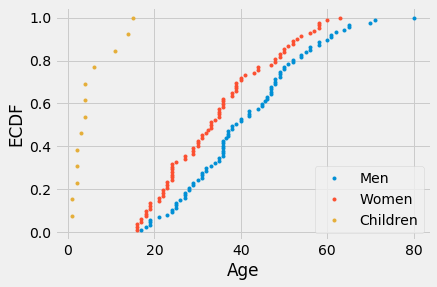

In [39]:
plt.style.use('fivethirtyeight')


plt.plot(X_man,Y_man,     marker='.',     linestyle='none',label='Men')
plt.plot(X_woman,Y_woman,     marker='.',     linestyle='none',label='Women')
plt.plot(X_child,Y_child,     marker='.',     linestyle='none',label='Children')
_=plt.legend()
_=plt.xlabel('Age')
_=plt.ylabel('ECDF')

<b> Note </b>: Women CDF is to the left <br>
This implies that Women were younger at all percentiles
<br><br>

or(same)
<br><br>
For every Age the fraction of Women Below that age is more  that the fraction of men below that age

In [55]:
percentiles = [2.5,25,50,75,97.5]
ptiles_age = np.percentile(df[df['who']=='man'].age,percentiles )

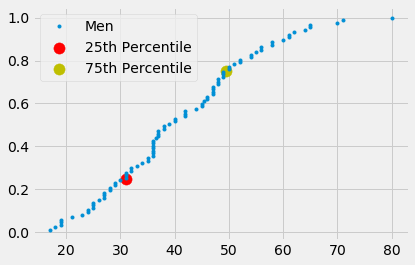

In [52]:
plt.plot(X_man,Y_man,     marker='.',     linestyle='none',label='Men')
plt.scatter(ptiles_age[1], percentiles[1]/100    , marker='.',  c='r',  s=500,label='25th Percentile'.format(ptiles_age[1]))
plt.scatter(ptiles_age[3], percentiles[3]/100    , marker='.',  c='y',  s=500,label='75th Percentile'.format(ptiles_age[1]))
plt.legend()

<b> Inter Quantile Distance </b> = 75th Percentile - 25th Percentile
- It is a measure of variability that is robust in the presence of errors or extreme values.

In [54]:
IQR = ptiles_age[3] - ptiles_age[1]
IQR

18.5

### Oversampling Problem ( Uneven sampling)

Datasets are not a representation of the Entire Population
- Some Groups can be "oversampled"
- Correct for Oversampling using <b> Resampling </b>

In [58]:
import pandas as pd
import tables
filename = 'datasets/nsfg.hdf5'
df = pd.read_hdf(filename)
df.head(2)

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843


- Resampling data using the sampling weights in wgt2013_2015(CASE WEIGHTS). The result is a sample that is representative of the U.S. population.

In [60]:
df['wgt2013_2015'].head(3)  #Final post-stratified, fully adjusted CASE WEIGHT

0    3554.964843
1    3554.964843
2    3554.964843
Name: wgt2013_2015, dtype: float64

In [62]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights  (SAMPLING WEIGHTS)

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)  #sampling with replacement
    sample = df.loc[indices]
    return sample

In [63]:
# Resample the data
df = resample_rows_weighted(df, 'wgt2013_2015')

In [64]:
# Clean the weight variables
pounds = df['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = df['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [65]:
# Create a Boolean Series for full-term babies
full_term = df['prglngth'] >= 37  #pregnancy > 37 weeks

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


In [66]:
# Filter single births
single = df['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]    ##NOT OPERATOR ON BOOLEAN ~
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222


### Quantitaive Exploration

#### Means ,Medians, Percentiles

In [98]:
age =df['age']
age = [x for x in age if str(x) != 'nan']
print("Mean             :",np.mean(age))
print("Median           :",np.median(age))
print("25th Percentile  :",np.percentile(age, [25,50,75])[0] )
print("50th Percentile  :",np.percentile(age, [25,50,75])[1] )
print("75th Percentile  :",np.percentile(age, [25,50,75])[2] )

Mean             : 29.69911764705882
Median           : 28.0
25th Percentile  : 20.125
50th Percentile  : 28.0
75th Percentile  : 38.0


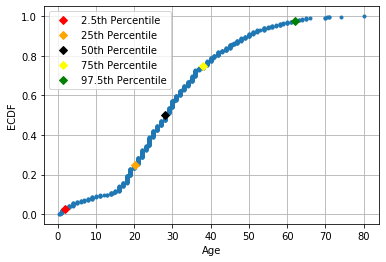

In [120]:
percentiles = [2.5,25,50,75,97.5]
ptiles_age = np.percentile(age,percentiles )

X =np.sort(df['age'])
X = [x for x in X if str(x) != 'nan']
Y = np.arange(1,len(X)+1)/len(X) 

plt.plot(X,Y,     marker='.',     linestyle='none')

plt.plot(ptiles_age[0], np.array(percentiles[0])/100, marker='D', color='red',
         linestyle='none',label='2.5th Percentile')
plt.plot(ptiles_age[1], np.array(percentiles[1])/100, marker='D', color='orange',
         linestyle='none',label='25th Percentile')
plt.plot(ptiles_age[2], np.array(percentiles[2])/100, marker='D', color='black',
         linestyle='none',label='50th Percentile')
plt.plot(ptiles_age[3], np.array(percentiles[3])/100, marker='D', color='yellow',
         linestyle='none',label='75th Percentile')
plt.plot(ptiles_age[4], np.array(percentiles[4])/100, marker='D', color='green',
         linestyle='none',label='97.5th Percentile')
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.legend()
plt.grid()

#### Box Plot

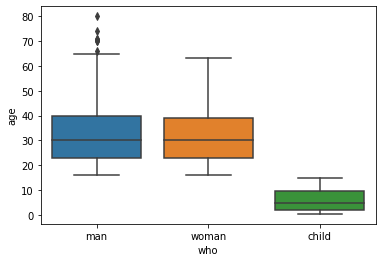

In [125]:
_=sns.boxplot(x='who',y='age',data=df)


#### Variance, Covariance, S.D, Correlation

##### VARIANCE

Unit:     Units**2
 

In [128]:
np.var(df['age'])

210.7235797536662

##### S.D

Unit:     Units

In [129]:
np.std(df['age'])

14.516321150817317

##### CORRELATION

Measure of how two quantities vary together

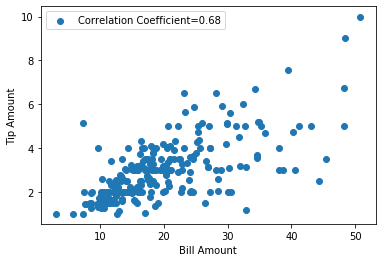

In [196]:
df = sns.load_dataset('tips')

plt.scatter(df['total_bill'],df['tip'],label=f"Correlation Coefficient={np.corrcoef(df['total_bill'],df['tip'])[0,1]:.2f}")
_=plt.xlabel('Bill Amount')
_=plt.ylabel('Tip Amount')
_=plt.legend()

In [151]:
np.var(df['tip'])

1.9066085124966428

In [167]:
covariance_matrix = np.cov(df['total_bill'],df['tip'])
print("Covariance Matrix:")
print(covariance_matrix)
print("")
print("Covariance Matrix[0,0]=Variance in X-axis:        ",covariance_matrix[0,0])
print("Covariance Matrix[1,1]=Variance in Y-axis:        ",covariance_matrix[1,1])

print("")
print("Covariance Matrix[0,1], Covariance Matrix[1,0]:      Co-Variances")


Covariance Matrix:
[[79.25293861  8.32350163]
 [ 8.32350163  1.91445464]]

Covariance Matrix[0,0]=Variance in X-axis:         79.25293861397829
Covariance Matrix[1,1]=Variance in Y-axis:         1.914454638062473

Covariance Matrix[0,1], Covariance Matrix[1,0]:      Co-Variances


##### CORRELATION COEFFICIENT

$$\rho = Pearson Correlation = \frac{\text{covariance}}{\text{(std of x)(std of y)}}$$ 

$$ = \frac{\text{Variability due to Co-dependence}}{\text{Independent Variability}}$$

In [174]:
print(np.corrcoef(df['total_bill'],df['tip']))
print("")
print("Pearson Correlation Coefficient:     ",np.corrcoef(df['total_bill'],df['tip'])[0,1])


[[1.         0.67573411]
 [0.67573411 1.        ]]

Pearson Correlation Coefficient:      0.6757341092113641


### Relationships between Variables

#### Scatter Plot

In [105]:
import pandas as pd
import tables
filename = 'datasets/weight.hdf5'
df = pd.read_hdf(filename)
df = df[['WTKG3', 'HTM4' , 'AGE']]
df.columns = ['weight','height','age']
df.head(2)

,weight,height,age
96230,60.33,160.0,47.0
244920,58.97,163.0,89.5


In [110]:
height = df['height']
weight = df['weight']

Text(0, 0.5, 'Weight(kg)')

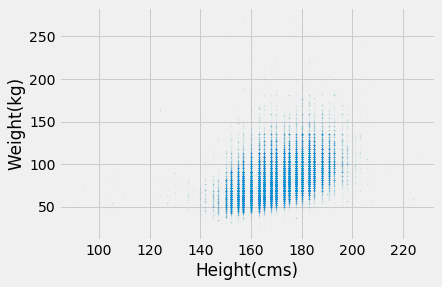

In [117]:
plt.plot(height, weight,'o', alpha=0.02, ms=1)
plt.xlabel("Height(cms)")
plt.ylabel('Weight(kg)')

<b> NOTE </b> : Heights were measure in Inches and Rounded off into Cms, thus we see discrete patterns in the plot.

Thus use <b> Random </b> on  data (both columns since this efect is also seen on weights)

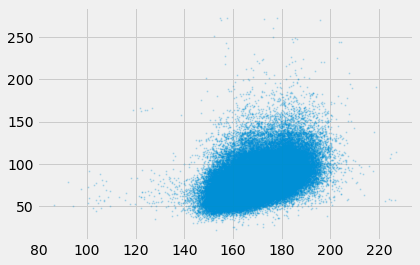

In [122]:
height_jittered = height + np.random.normal(0,2,size=len(height))
weight_jittered =weight + np.random.normal(0,2,size=len(weight))
plt.plot(height_jittered, weight_jittered,'o', alpha=0.2, ms=1)

<b> ZOOMING </b>

[140, 200, 0, 160]

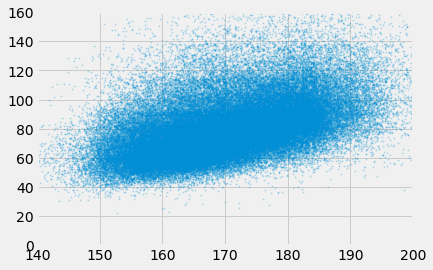

In [123]:
plt.plot(height_jittered, weight_jittered,'o', alpha=0.2, ms=1)
plt.axis([140,200,0,160])

#### Box Plot

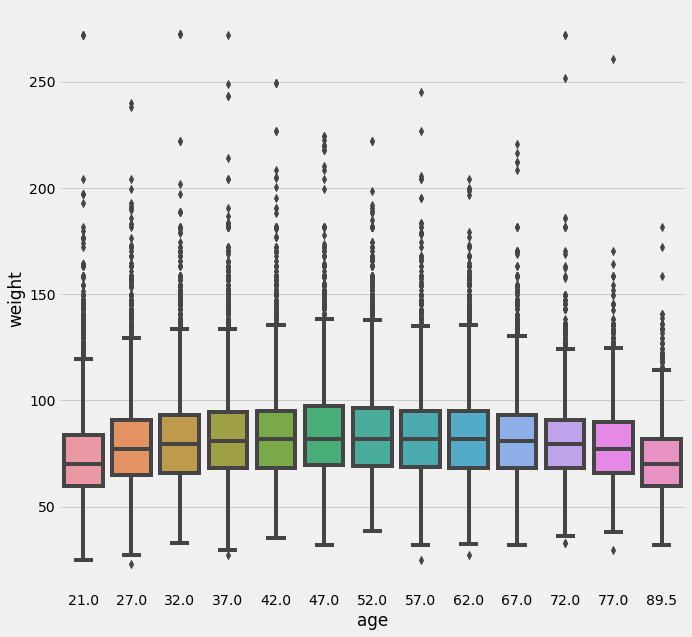

In [133]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x='age',y='weight', data=df)
#whis = Proportion of the IQR past the low and high quartiles to extend the plot whiskers.
#Points outside this range will be identified as outliers.

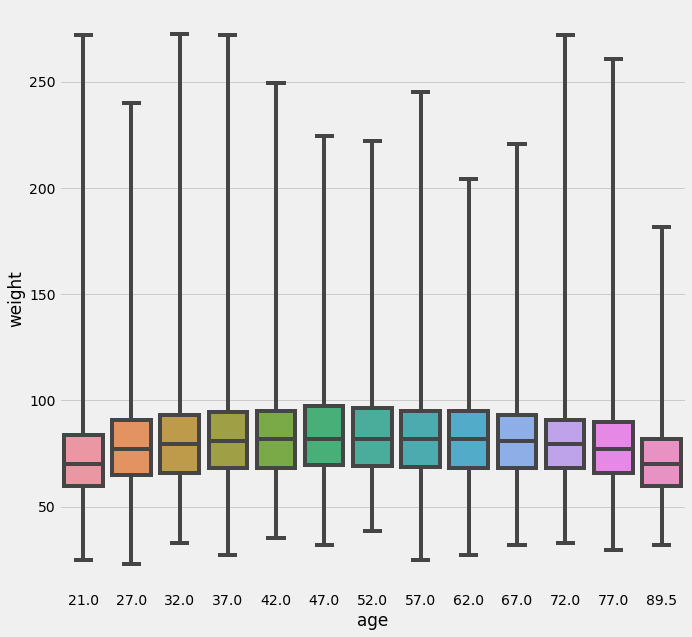

In [146]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x='age',y='weight', data=df, whis=10)

Text(0, 0.5, 'log - scale weight')

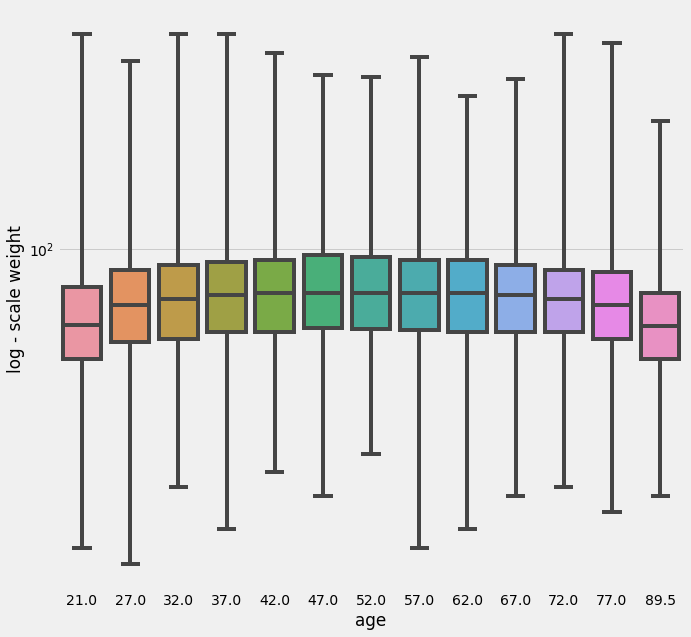

In [148]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x='age',y='weight', data=df, whis=10)
plt.yscale('log')
plt.ylabel('log - scale weight')

#### Violin Plot

In [125]:
df.head(2)

,weight,height,age
96230,60.33,160.0,47.0
244920,58.97,163.0,89.5


In [124]:
import seaborn as sns

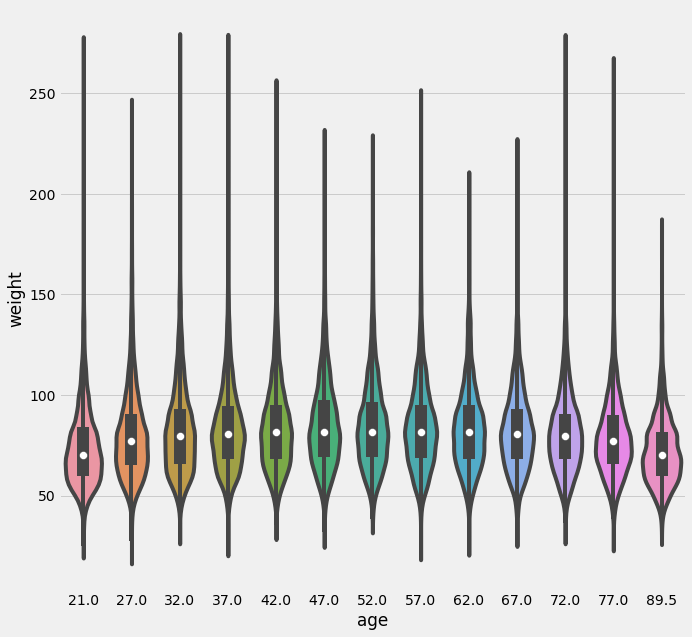

In [129]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(ax=ax,x='age',y='weight', data=df)

#### PMF

In [152]:
import pandas as pd
import tables
filename = 'datasets/weight.hdf5'
df = pd.read_hdf(filename)
df.head(3)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0


In [153]:
# Extract income
income = df['INCOME2']

In [154]:
pmf = income.value_counts().sort_index() / len(income)

<BarContainer object of 8 artists>

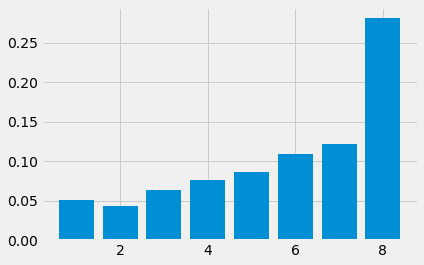

In [155]:
plt.bar(pmf.index , pmf)

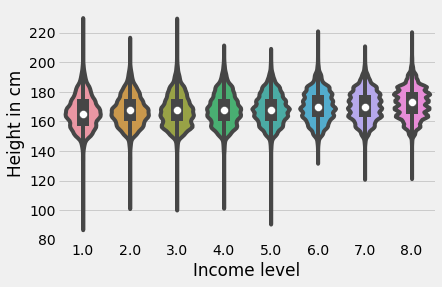

In [157]:
data = df.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

#### Correlation


Pearsons Coeff. of Correlation = Quantifies Strength of Linear  Relationships b/w variables <br> 
Rage = [-1,1]

Corr. Coeff ~ 0 ---> Weak Linear Relationship  <br>
Corr. Coeff ~ +1/-1 ---> Strong Linear Relationship

In [159]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']   
#represents the number of servings of vegetables respondents reported eating per day.
subset = df[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


<b> NOTE! </b> Low corrletaion doesnt mean there is no relationship (there can be a strong non-linear relationship)

<b> NOTE! </b> Correlation does not tell info. about <b> SLOPE </b>

#### Simple Linear Regression  (Explainig Relationship b.w Numeric Variables)

In [162]:
from scipy.stats import linregress

In [187]:
df.head(2)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5


In [188]:
df = df.dropna()
income = df['INCOME2']
veg_consump = df['_VEGESU1']

In [189]:
regression = linregress(income,veg_consump )
regression

LinregressResult(slope=0.06899182688104662, intercept=1.5355696601372002, rvalue=0.11720979363312559, pvalue=5.088399818030942e-219, stderr=0.002176430509081018)

rvalue= Correlation Coefficient

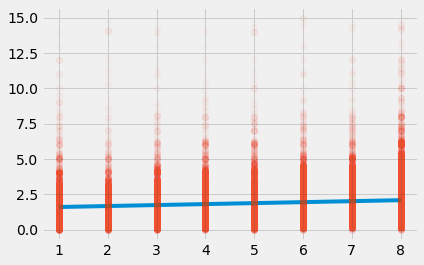

In [198]:
fx = np.array([income.min() , income.max()])
fy = regression.intercept + regression.slope*fx
plt.plot(fx, fy, '-')
plt.plot(income,veg_consump, 'o', alpha=0.01 )

#### Limits of Regression

<b> Regression is not Symmetric </b>  <br>
<b> Regression Does not tell us about CAUSATION </b>

Text(0, 0.5, 'Vegetable Consumption')

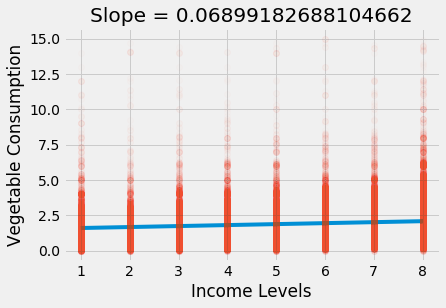

In [212]:
from scipy.stats import linregress
df = df.dropna()
income = df['INCOME2']
veg_consump = df['_VEGESU1']
regression = linregress(income,veg_consump )
fx = np.array([income.min() , income.max()])
fy = regression.intercept + regression.slope*fx
plt.plot(fx, fy, '-')
plt.plot(income,veg_consump, 'o', alpha=0.01 )
_=plt.title('Slope = {}'.format(regression.slope))
plt.xlabel('Income Levels')
plt.ylabel('Vegetable Consumption')

Text(0, 0.5, 'Income Level')

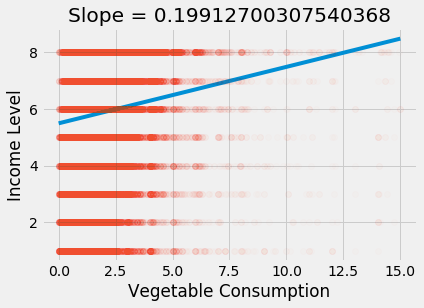

In [213]:
regression = linregress(veg_consump,income)
fx = np.array([veg_consump.min() , veg_consump.max()])
fy = regression.intercept + regression.slope*fx
plt.plot(fx, fy, '-')
plt.plot(veg_consump,income, 'o', alpha=0.01 )
plt.title('Slope = {}'.format(regression.slope))
plt.xlabel('Vegetable Consumption')
plt.ylabel('Income Level')

#### Multiple Regression

``` python
#NOte: to Predict: COL1

import statsmodels.formula.api as smf
#Ordinary Least Square Regression
results = smf.ols('COL1 ~ COL2' , data = df).fit()
results.params


#Multiple Regression
results = smf.ols('COL1 ~ COL2 + COL3' , data = df).fit()
results.params

##NON-Linear Model::
Adding a New COlum to DataFrame with Non-Linear Term:
    eg: df['C2_squared'] = df['C2']**2
results = smf.ols('C1 ~ C2 + C2_squared + C3 + C2_squared', data=gss).fit()
results.params



###PREDICTIONS##
Create a DatFrame:
    #Atrificial Data
df_test['age'] = np.linspace(18,85)
df_test['age_2'] = df_test['age']**2
df_test['educ'] = 12   #Holding Education years constant
df_test['educ_2'] = df_test['educ']**2
predictions = results.predict(df_test)
```

##### Simple Regression

In [214]:
import statsmodels.formula.api as smf

In [215]:
df.head(2)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5


In [218]:
#Ordinary Least Square Regression
results = smf.ols('INCOME2 ~ _VEGESU1' , data = df).fit()
results.params      #Slope & Intercept

Intercept    5.491613
_VEGESU1     0.199127
dtype: float64

##### Multiple Regression

In [222]:
##DATA
import pandas as pd
import tables
filename = 'datasets/gss.hdf5'
df = pd.read_hdf(filename)
df.head(2)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446


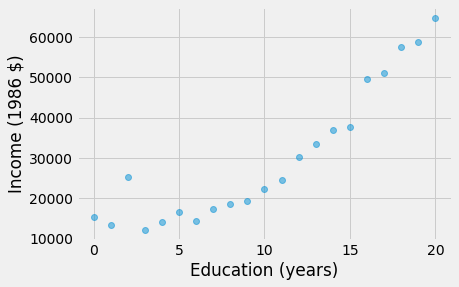

In [223]:
# Group by educ
grouped = df.groupby('educ')
# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()
# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)
# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [231]:
# Add a new column with educ squared
df['educ2'] = df['educ']**2
# Add a new column with age squared
df['age2'] = df['age']**2

In [232]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=df).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [239]:
# Make the Test DataFrame
df_test = pd.DataFrame()
df_test['educ'] = np.linspace(0, 20)
df_test['age'] = 30
df_test['educ2'] = df_test['educ']**2
df_test['age2'] = df_test['age']**2
df_test.head(2)

,educ,age,educ2,age2
0,0.000000,30,0.000000,900
1,0.408163,30,0.166597,900


In [236]:
# Generate and plot the predictions
pred = results.predict(df)  #generate predicted income as a function of education.
pred.head()

0    51567.255819
1    33096.421063
2    34293.491054
3    40225.035007
4    33697.225100
dtype: float64

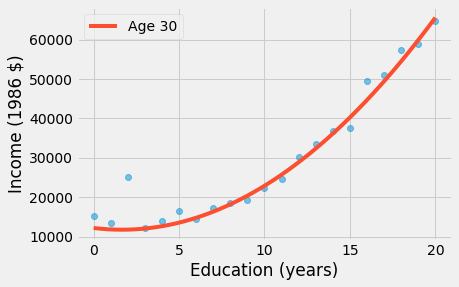

In [241]:
grouped = df.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)



# Plot the predictions
pred = results.predict(df_test)
plt.plot(df_test['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

#### Logistic Regression  (Explainig Relationship b.w Categorical Variable and Numeric Variables)

<b> Explainig Relationship b.w Categorical Variable and Numeric Variables

<b> Categorical Variables </b> : Eg: Sex, Race.      
        

``` python
import statsmodels.formula.api as smf
#Ordinary Least Square Regression
results = smf.logit('COL1 ~ COL2 + C(COL3)' , data = df).fit()     
#C() --> Categorical Variable
results.params

#NOte: to Predict: COL1
```

In [245]:
##DATA
import pandas as pd
import tables
filename = 'datasets/gss.hdf5'
df = pd.read_hdf(filename)
df.head(2)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446


<b> grass - column </b> : "Do you think the use of marijuana should be made legal or not?"

1 = YES <b>
2 = NO

In [247]:
df.grass.value_counts()

2.0    25195
1.0    11027
Name: grass, dtype: int64

<b> Conver to 1/0 Values </b>

In [248]:
# Recode grass
df['grass'].replace(2, 0, inplace=True)

In [252]:
df.grass.value_counts()

0.0    25195
1.0    11027
Name: grass, dtype: int64

In [249]:
# Add a new column with educ squared
df['educ2'] = df['educ']**2
# Add a new column with age squared
df['age2'] = df['age']**2

In [251]:
# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=df).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [254]:
# Make a Test DataFrame with a range of ages
df_test = pd.DataFrame()
df_test['age'] = np.linspace(18, 89)
df_test['age2'] = df_test['age']**2

# Set the education level to 12
df_test['educ'] = 12
df_test['educ2'] = df_test['educ']**2

In [255]:
df_test.head(2)

,age,age2,educ,educ2
0,18.00000,324.000000,12,144
1,19.44898,378.262807,12,144


In [257]:
# Generate predictions for men 
df_test['sex'] = 1  #MEN
pred1 = results.predict(df_test)

# Generate predictions for  women
df_test['sex'] = 2     #WOMEN
pred2 = results.predict(df_test)

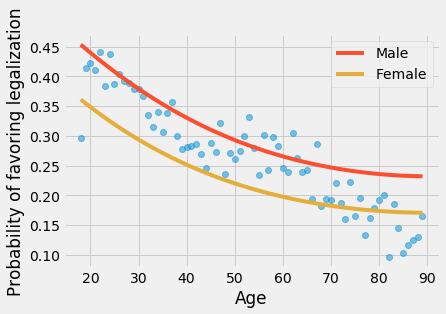

In [264]:
grouped = df.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)


plt.plot(df_test['age'], pred1, label='Male')
plt.plot(df_test['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

## Thinking probabilistically

### Bernoulli

<b>Bernoulli Trial :</b>
<br>
    Experiments that has 2 options (Sucess/Failure)

In [222]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""

    n_success = 0

    for i in range(n):

        random_number = np.random.random()
        if random_number < p:
            n_success+=1

    return n_success

<b> Scenario: </b>
<br>
Bank Issues 100 mortgage loans
<br>
Probability of a default is p = 0.05

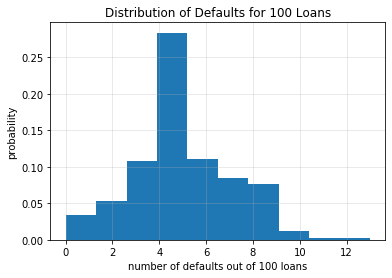

In [279]:
n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)



_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.grid(alpha=0.35)
_=plt.title(f"Distribution of Defaults for {100} Loans")


In [280]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

In [282]:
x,y= ecdf(n_defaults)

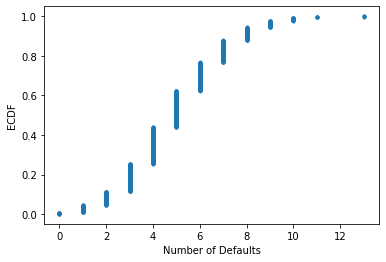

In [293]:
plt.plot(x,y,linestyle='none', marker='.')
_=plt.xlabel('Number of Defaults')
_=plt.ylabel('ECDF')


<b> Scenario </b>:
<br>
The bank will lose money if 10 or more of its loans are defaulted upon.
<br>
What is the probability that the bank will lose money?

In [297]:
n_lose_money = np.sum(n_defaults>=10)


print('Probability of losing money =', n_lose_money / len(n_defaults)*100 ,'%')

Probability of losing money = 2.3 %


<b> Simulating Four Coin Flips: </b>

In [355]:
np.random.seed(42)
rnd_num = np.random.random(size=4)
heads = rnd_num < 0.5
np.sum(heads)

1

In [354]:
n_heads_all = 0
    
for i in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_heads_all +=1
print(f"Probability of Getting 4 consecutive Heads is: {(n_heads_all/10000)*100} %")

Probability of Getting 4 consecutive Heads is: 6.1899999999999995 %


### Binomial

The Number of <b>"r"</b> successes in <b> "n"</b> Bernaouuli Trials with probability <b> "p" </b> of Success is <b> Binomially Distributed </b>

<br>

Example:  The Number of heads(<b>r</b>) in 4 Coin Flips, with probability 0.5 of heads, is Binomially Distributed

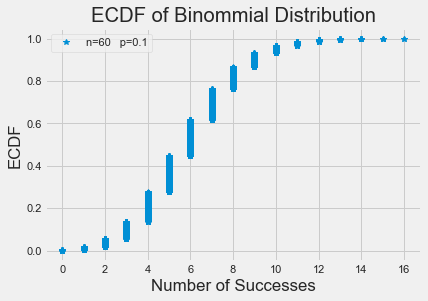

In [438]:
sample = np.random.binomial(n=60,p=0.1,size=10000)
x,y = ecdf(sample)
plt.plot(x,y,linestyle='none',marker='*',label=f"n={60}   p={0.1}")
_=plt.xlabel("Number of Successes")
_=plt.ylabel("ECDF")
plt.title("ECDF of Binommial Distribution")
plt.legend()


Text(0.5, 1.0, 'Histogram')

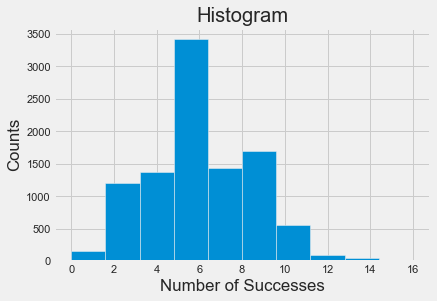

In [442]:
_=plt.hist(sample)
_=plt.xlabel("Number of Successes")
_=plt.ylabel("Counts")
plt.title("Histogram")

<b> Scenario: </b>
<br>
Bank Issues 100 mortgage loans
<br>
Probability of a default is p = 0.05

Text(0, 0.5, 'CDF')

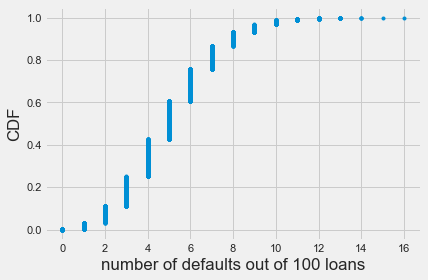

In [446]:
n_defaults = np.random.binomial(n=100,p=0.05,size=10000)
x,y = ecdf(n_defaults)
plt.plot(x,y,linestyle='none', marker='.')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')

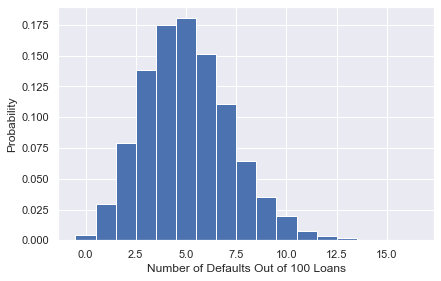

In [464]:
bins = np.arange(max(n_defaults) + 1.5) - 0.5


plt.hist(n_defaults,bins=bins,density=True)


plt.xlabel('Number of Defaults Out of 100 Loans')
plt.ylabel('Probability')

plt.show()

### Poisson

<b>Poisson Process</b>
<br>
Timing of next event is completly independent of when the previous event occured.

<b> Poisson Distribution </b>
<br>
The number of Arrivals (<b> r</b>) of a Poisson Process in a given time interval with average rate of  ? arrivals per interval is poisson distributed
<br><br>
EXAMPLE :  The number of Hits (<b> r</b>) on a website in One hour with an average hit rate of 6 hits per hour

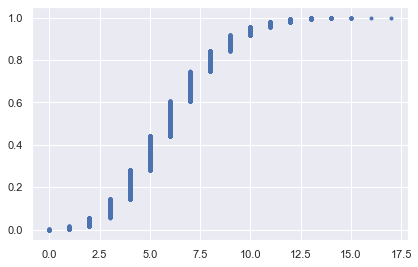

In [467]:
samples = np.random.poisson(6, size=10000)
x,y = ecdf(samples)
plt.plot(x,y,linestyle='none',marker='.')

(array([1.540e+02, 1.278e+03, 2.981e+03, 1.636e+03, 2.396e+03, 1.130e+03,
        2.210e+02, 1.780e+02, 2.400e+01, 2.000e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

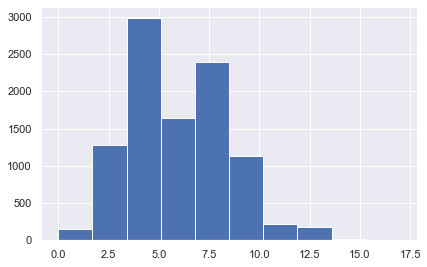

In [468]:
plt.hist(samples)

### Normal Distribution

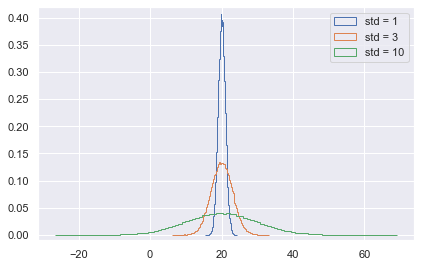

In [481]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,100000)
samples_std3 = np.random.normal(20,3,100000)
samples_std10 = np.random.normal(20,10,100000)

# Make histograms

plt.hist(samples_std1,bins=100,density=True,histtype='step')
plt.hist(samples_std3,bins=100,density=True,histtype='step')
plt.hist(samples_std10,bins=100,density=True,histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


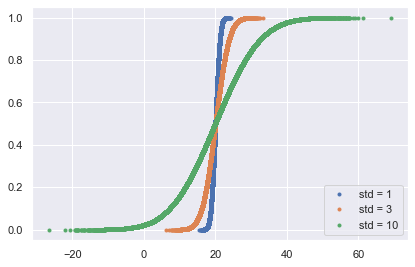

In [482]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1,marker='.',linestyle='none')
plt.plot(x_std3, y_std3,marker='.',linestyle='none')
plt.plot(x_std10, y_std10,marker='.',linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [74]:
speed_of_light = np.array([299850,299740,299900,300070,299930,299850,299950,299980,299980,299880,300000,299980,299930,299650,299760,299810,300000,300000,299960,299960,299960,299940,299960,299940,299880,299800,299850,299880,299900,299840,299830,299790,299810,299880,299880,299830,299800,299790,299760,299800,299880,299880,299880,299860,299720,299720,299620,299860,299970,299950,299880,299910,299850,299870,299840,299840,299850,299840,299840,299840,299890,299810,299810,299820,299800,299770,299760,299740,299750,299760,299910,299920,299890,299860,299880,299720,299840,299850,299850,299780,299890,299840,299780,299810,299760,299810,299790,299810,299820,299850,299870,299870,299810,299740,299810,299940,299950,299800,299810,299870
])

mean = np.mean(speed_of_light)
sd = np.std(speed_of_light)

In [85]:
samples = np.random.normal(mean,sd,10000)

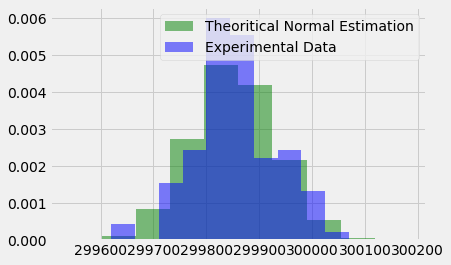

In [76]:
plt.hist(samples ,bins=10,color='green',alpha=0.5,density=True,label='Theoritical Normal Estimation')
plt.hist(speed_of_light,bins=10,color='blue',alpha=0.5,density=True,label='Experimental Data')
plt.legend()

<b> Kernel Density Estimate Comparision </b>

In [77]:
import seaborn as sns

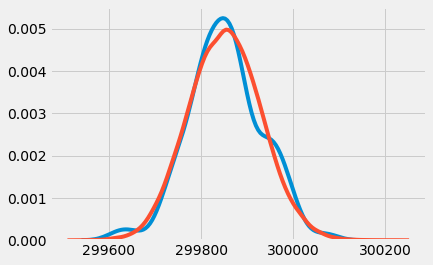

In [86]:
sns.kdeplot(speed_of_light)
sns.kdeplot(samples)

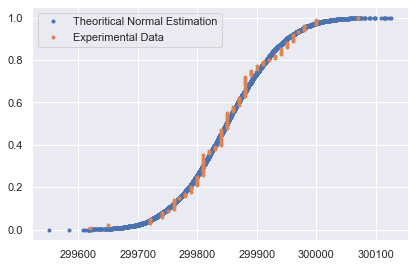

In [523]:
x,y = ecdf(samples)
x1,y1 = ecdf(speed_of_light)
plt.plot(x,y,linestyle='none',marker='.',label='Theoritical Normal Estimation')
plt.plot(x1,y1,linestyle='none',marker='.',label='Experimental Data')
plt.legend()

- Good Overlap ,thus Normal Distribution is a good parametric model of the data

### Exponential Distribution

Waiting time between arrivals of a Poisson Process is Exponentially Distributed
<br><br>
Nuclear Accident is a rare event, which can be modeled as a Poisson process, and the waiting time between accidents of a Poisson process is Exponentially distributed

In [524]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


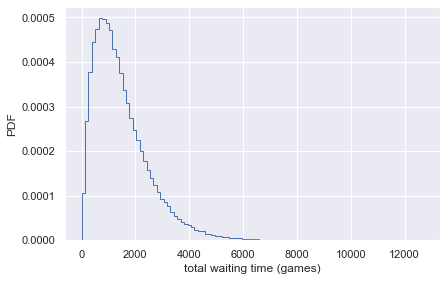

In [525]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Parameter estimation

### Matching A Distribution to Data and Comparing it with Theoritical Distirbution using ECDF

In [754]:
tau = np.mean(xx)
inter_nohitter_time = np.random.exponential(tau, 100000)

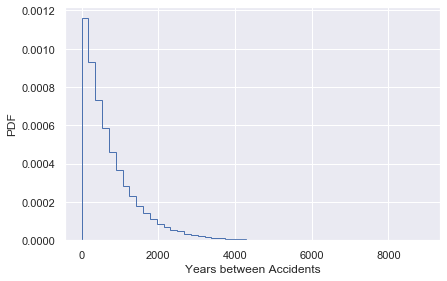

In [755]:
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Years between Accidents')
_ = plt.ylabel('PDF')

In [756]:
xx = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

Text(0, 0.5, 'CDF')

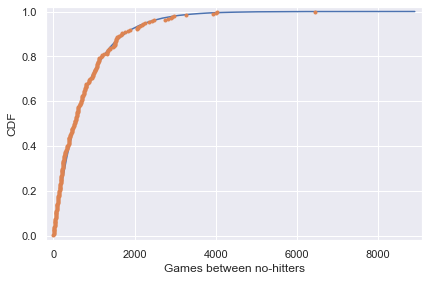

In [757]:
# Create an ECDF from real data: x, y
x, y =ecdf(xx)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

### Linear Regression





In [761]:
illetracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

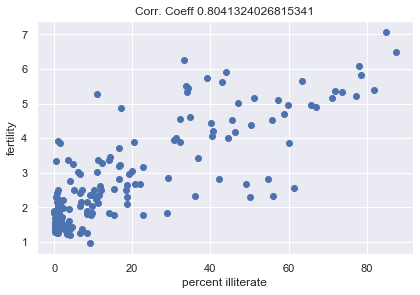

In [768]:
plt.scatter(illetracy,fertility)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
_=plt.title(f"Corr. Coeff {np.corrcoef(illetracy,fertility)[0,1]}")

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


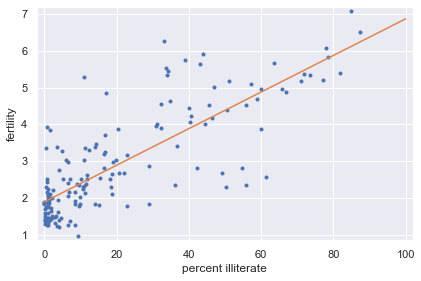

In [843]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illetracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illetracy, fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x+ b

# Add regression line to your plot
_ = plt.plot(x,y)




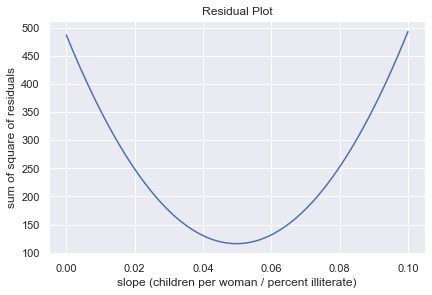

In [844]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illetracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.title("Residual Plot")
plt.show()


$$\fbox{Importance of Doing Graphical EDA first!}$$

$$\text{Anscombe's Quatret}$$

In [797]:
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])]

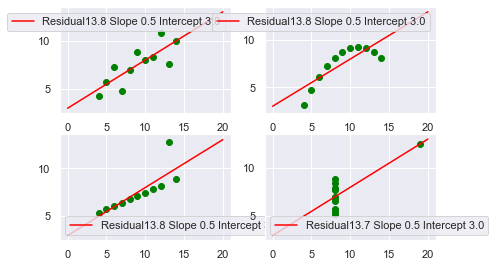

In [839]:
fig, axes = plt.subplots(2,2)
for i,j,k in zip(anscombe_x, anscombe_y,axes.flat):
    a,b = np.polyfit(i,j,1)
    x=np.array([0,20])
    y = a*x + b
    res = np.sum((j-a*i-b)**2)
    k.plot(x,y,color='red',label=f"Residual{res:.1f} Slope {a:.1f} Intercept {b:.1f}")
    k.scatter(i,j,color='green')
    k.legend()  
    

### Bootstraping

#### Introduction

<p style="border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
 $$ \text{[Sampling with replacement + Compute Summary Statistic] :   n times}$$
<br><br>
<b>BootStraped Sample       </b>            : Resampled Array
<br><br>
<b>BootStraped Replicate</b>: Statistic Computed from BootStraped Sample
 
</p>

<b>BootStraped Sample</b>   :   np.random.choice([1,2,3,4] ,size= 4)

<center><b style="font-size:20px;color:red">Data : Annual Rainfall Data in Coimbatore from 1883 to 2015  </b></center>


In [1114]:
annual_rainfall_mm = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

In [1115]:
year = np.arange(1883,2016)

In [1136]:
plt.figuresize?

Object `plt.figuresize` not found.


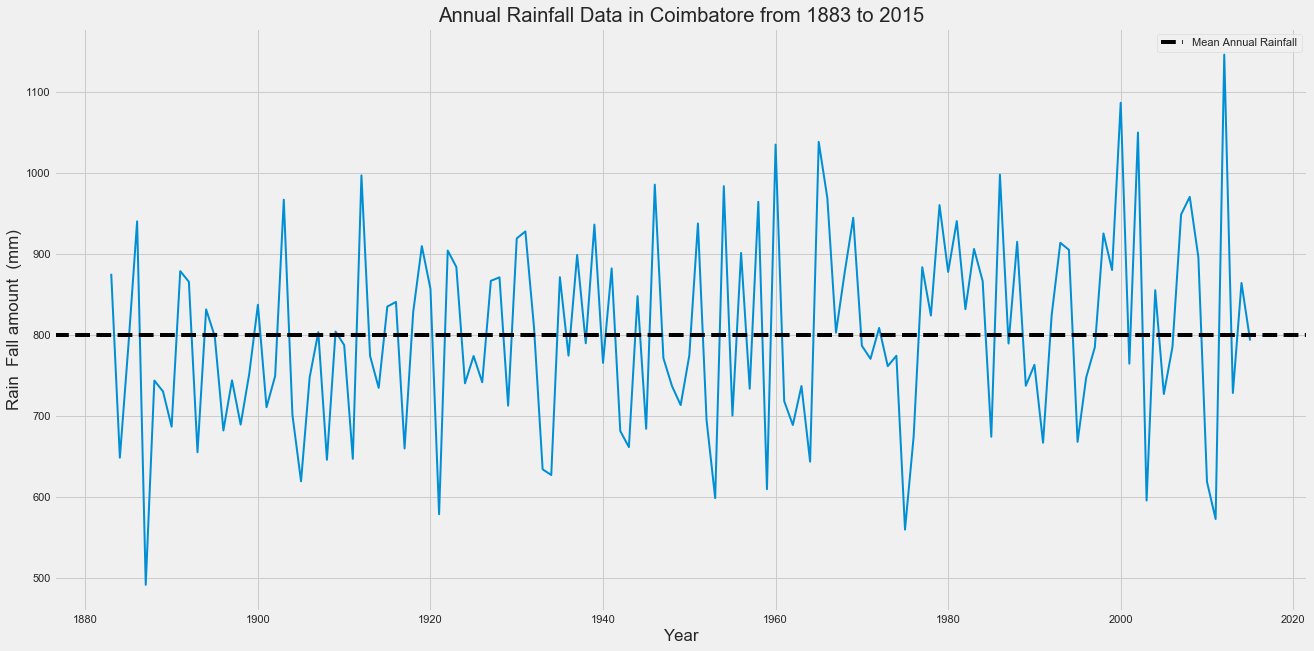

In [1137]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot(year, annual_rainfall_mm,lw=2)
plt.axhline(np.mean(annual_rainfall_mm),color='black',linestyle='--',label="Mean Annual Rainfall")
_=plt.xlabel("Year")
_=plt.ylabel("Rain  Fall amount  (mm)")
_=plt.legend()
_=plt.title("Annual Rainfall Data in Coimbatore from 1883 to 2015")

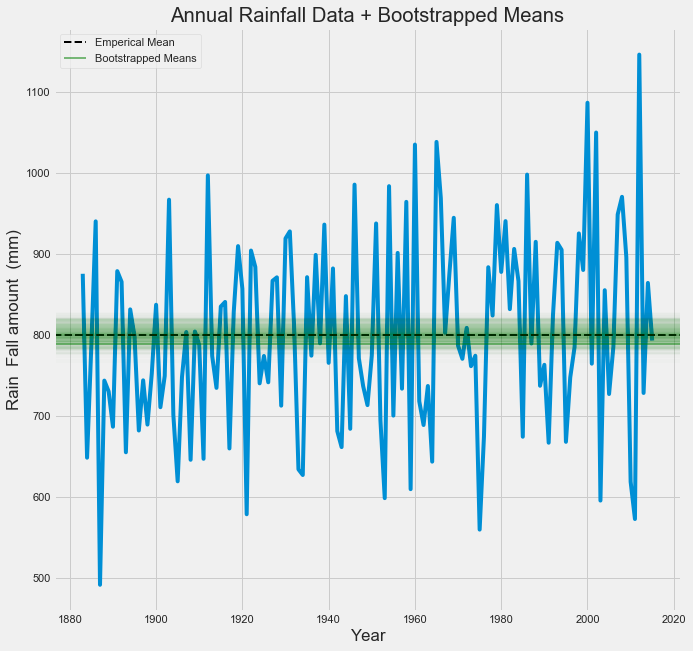

In [1157]:
plt.figure(figsize=(10,10))
plt.plot(year, annual_rainfall_mm)
plt.axhline(np.mean(annual_rainfall_mm),color='black',lw=2,ls='--',label="Emperical Mean")
for _ in range(500):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(annual_rainfall_mm, size=len(annual_rainfall_mm))
    mean = np.mean(bs_sample)
    plt.axhline(mean, color='green', alpha=0.01,lw=2)
    
bs_sample = np.random.choice(annual_rainfall_mm, size=len(annual_rainfall_mm))
mean = np.mean(bs_sample)
plt.axhline(mean, color='green', alpha=0.5,lw=2,label="Bootstrapped Means")
_=plt.legend()
_=plt.xlabel("Year")
_=plt.ylabel("Rain  Fall amount  (mm)")

_=plt.title("Annual Rainfall Data + Bootstrapped Means")

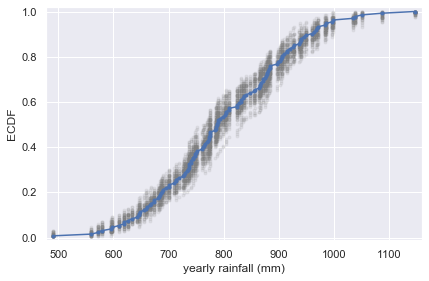

In [853]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(annual_rainfall_mm, size=len(annual_rainfall_mm))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)
    

# Compute and plot ECDF from original data
x, y = ecdf(annual_rainfall_mm)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

#### Bootstrap confidence intervals


Bootstraped Estimate of the Mean

In [856]:
def bootstrap_replicate(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [858]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)

    return bs_replicates

$$  Standard Error of Mean = \frac{S.D. of Data}{sqrt(len(data))} $$

Standard Error of Mean 10.510549150506188
standard deviation of bootstrap replicates 10.499058257791594


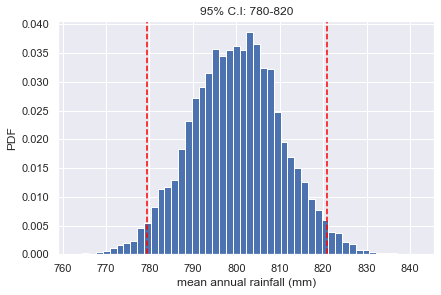

In [894]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(annual_rainfall_mm,np.mean,10000)

# Compute and print Standard Error of Mean
sem = np.std(annual_rainfall_mm) / np.sqrt(len(annual_rainfall_mm))
print("Standard Error of Mean",sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print("standard deviation of bootstrap replicates",bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')
plt.axvline(np.percentile(bs_replicates,[2.5,97.5])[0],color='red',linestyle='--')
plt.axvline(np.percentile(bs_replicates,[2.5,97.5])[1],color='red',linestyle='--')
plt.title("95% C.I: 780-820")
# Show the plot
plt.show()

<b> Confidence Interval: </b>

<b> p% </b> Confidence Interval of the Mean:

If we repeated The measurements over and over again, p% of the Observed Values would lie within the p% Confidence Interval

In [889]:
print("95% Confidence Interval of Mean:",np.percentile(bs_replicates,[2.5,97.5]))

95% Confidence Interval of Mean: [779.72099624 820.60471805]


#### Pairs Bootstrap for Linear Regression

|Summary Statitics Bootstrapping|Pairs Bootstrap|
|--|-------------------------------|
|Non Parametric Inference |Done on a Parametric Model|
|No assumption about Model or Probability Distribution|eg: Linear Regression (Parameters = Slope and Intercept)|
|Estimates Done Using Data Alone|Resample Data in Pairs|

$$ Process: $$
<b>Step 1</b> : Genrate Indices for Data 
<br>
<b>Step 2</b> :Sample Indices of Data Points
<br>
<b>Step 3</b>: Slice Out values from Original Data using these indices
<br>
<b>Step 4</b>: Perform Linear Regression on the Pairs Bootstrap Sample
<br>
<b>Step 5</b>: Repeat
<br>
<b>Step 6</b>: Find C.I.

In [895]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

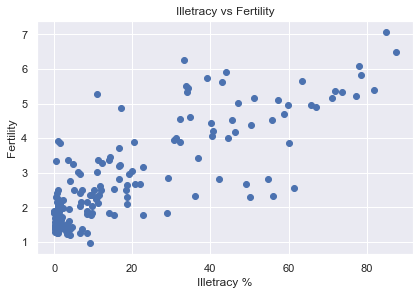

In [914]:
_=plt.scatter(illetracy,fertility)
_=plt.xlabel("Illetracy %")
_=plt.ylabel("Fertility")
_=plt.title("Illetracy vs Fertility")

95% C.I of Slope: [0.04475016 0.05533922]


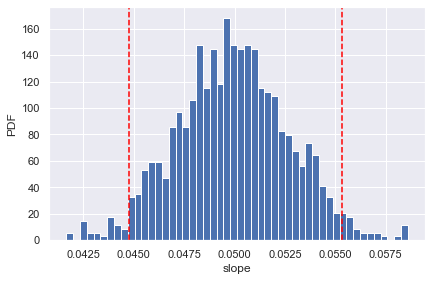

In [919]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illetracy,fertility,1000)

# Compute and print 95% CI for slope
print("95% C.I of Slope:",np.percentile(bs_slope_reps,[2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.axvline(np.percentile(bs_slope_reps,[2.5,97.5])[0], color='red',ls='--')
plt.axvline(np.percentile(bs_slope_reps,[2.5,97.5])[1], color='red',ls='--')
plt.show()

95% C.I of Intercept: [1.75206823 2.02633344]


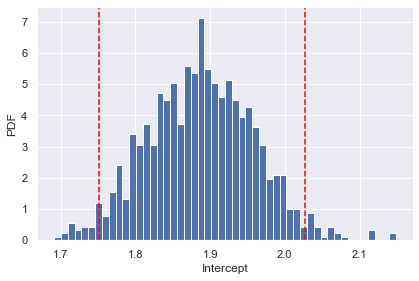

In [918]:

print("95% C.I of Intercept:",np.percentile(bs_intercept_reps,[2.5,97.5]))
# Plot the histogram
_ = plt.hist(bs_intercept_reps, bins=50, density=True)
_ = plt.xlabel('Intercept')
_ = plt.ylabel('PDF')
plt.axvline(np.percentile(bs_intercept_reps,[2.5,97.5])[0], color='red',ls='--')
plt.axvline(np.percentile(bs_intercept_reps,[2.5,97.5])[1], color='red',ls='--')
plt.show()

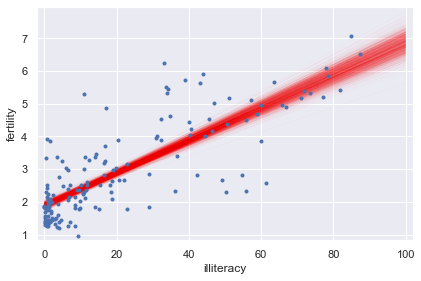

In [913]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(len(bs_slope_reps)):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.03, color='red')

# Plot the data
_ = plt.plot(illetracy,fertility,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

### Hypothesis Testing

-  Assesment of how Resonable the observed data are assuming a Hypothesis is True
<br><br>
<b> Null Hypothesis </b>: Hypothesis that we are testing
<br><br>
Permutation : Random Reordering of Entries in an array

$$ Permutation Sampling$$ 
$\text{Hypothesis : two variables have identical probability distributions}$

Null Hypothesis: Two States have similar voting distibutions for BJP
<br>
- Two States Votes(T.N: 30 Districts), (Kerela:15 Districts)  combined in a single array (30 + 15 = 45)
<br>
- Ignore which state they belong
<br>
- Random Scrambling (Permutation)     Assumption: Two quantities are Identically Distributed (Null Hypothesis)
<br>
- First 30 = T.N
<br>
- Next 15 = Kerela

bjp_votes = np.concatenate((state_1, state_2))
<br>
bjp_votes_permutated = np.random.permutation (bjp_votes)
<br>
bjp_votes_permutated[TN] = bjp_votes_permutated[:len(state_1)]
<br>
bjp_votes_permutated[Kerela] = bjp_votes_permutated[len(state_1):]

In [921]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [923]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

Hypotheses: Two months have Same Disribution of Rainfall

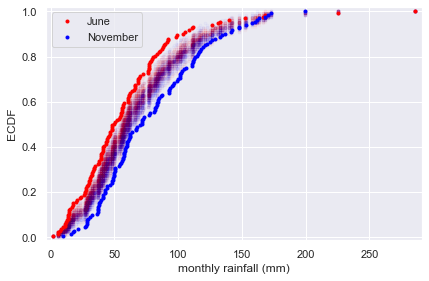

In [928]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label='June')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label='November')
_=plt.legend()
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

<b> Test Statistic: </b>
<br>
Single Number that can be computed from observed data and from data you simulate under the null hypothesis
<br>
Eg: <b> Difference in Mean </b>
<br><br>
<b>Permutation Replicate </b> : Difference in Means in Permutation samples
<br>
Compare Permutation Replicate with actual difference in Means
<br>
- Repeat to get many Permutation Replicate's
- Plot Histogram of all Permutation Replicate's

<b> p-value </b> : Probability of obtaining a value of the test statistic that is atleast as extreme as what we observed , under the assumption that the null hypothesis is True
<br>
<b> Statistical Significance: </b> Determined by the smallness of the p-value
<br>
<b> Null Hypothesis Significance Testing (NHST)</b>

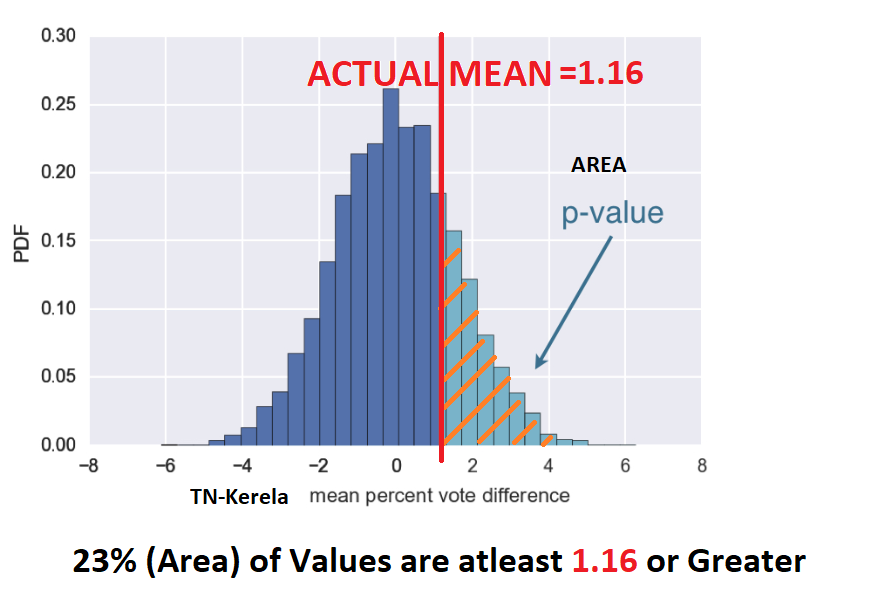

In [929]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)  #See Above Section for Function Definition

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [940]:
frog = {'frog_id':['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B'], 'impact_force':[1.612,0.605,0.327,0.946,0.541,1.539,0.529,0.628,1.453,0.297,0.703,0.269,0.751,0.245,1.182,0.515,0.435,0.383,0.457,0.730,0.172,0.142,0.037,0.453,0.355,0.022,0.502,0.273,0.720,0.582,0.198,0.198,0.597,0.516,0.815,0.402,0.605,0.711,0.614,0.468]
}
df = pd.DataFrame.from_dict(frog)

Frog A is an adult and Frog B is a juvenile

test the hypothesis that the two frogs have the same distribution of impact forces

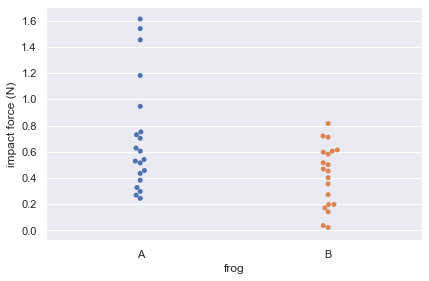

In [941]:
_ = sns.swarmplot(x='frog_id',y='impact_force',data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [942]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [943]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.006


There is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

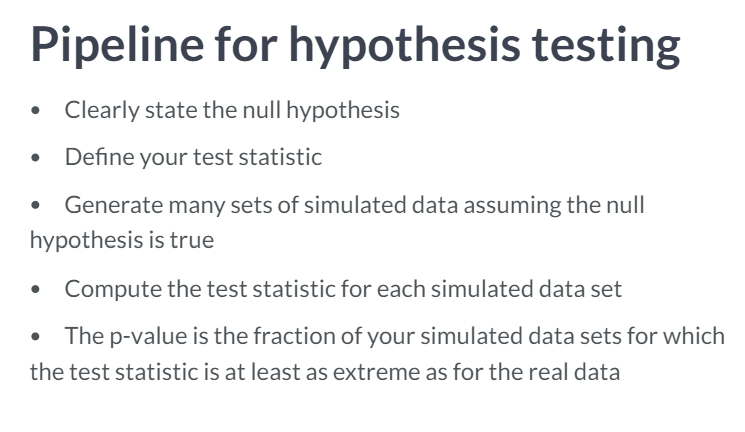

##### ONE SAMPLE TEST Example:1 "Speed of Light"

Compare one set of Data with a single Number

In [967]:
michelson_speed_of_light = np.array([299850,299740,299900,300070,299930,299850,299950,299980,299980,299880,300000,299980,299930,299650,299760,299810,300000,300000,299960,299960,299960,299940,299960,299940,299880,299800,299850,299880,299900,299840,299830,299790,299810,299880,299880,299830,299800,299790,299760,299800,299880,299880,299880,299860,299720,299720,299620,299860,299970,299950,299880,299910,299850,299870,299840,299840,299850,299840,299840,299840,299890,299810,299810,299820,299800,299770,299760,299740,299750,299760,299910,299920,299890,299860,299880,299720,299840,299850,299850,299780,299890,299840,299780,299810,299760,299810,299790,299810,299820,299850,299870,299870,299810,299740,299810,299940,299950,299800,299810,299870
])
simon_newcomb_mean_speed_light = 299860 #We only know Mean speed from Experiment

In [968]:
print("Michelson's Mean  : ",np.mean(michelson_speed_of_light) ,'m/s' )
print("Simon's Mean      : ",simon_newcomb_mean_speed_light ,'m/s')

Michelson's Mean  :  299852.4 m/s
Simon's Mean      :  299860 m/s


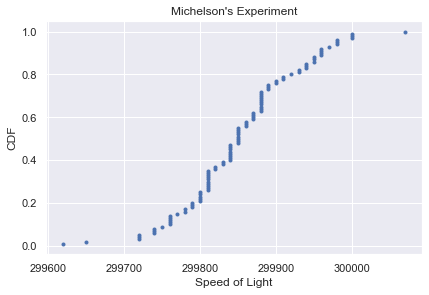

In [956]:
x,y = ecdf(michelson_speed_of_light)
plt.plot(x,y,marker='.', linestyle='none')
_=plt.xlabel('Speed of Light')
_=plt.ylabel('CDF')
_=plt.title("Michelson's Experiment")


<b> Question to Probe:</b>
- Could Michelson have gotten the dataset he did if the true mean speed in his experiment was equal to Simon's experiment <b>????</b>
<br><br>
<b> NULL HYPOTHESIS:</b> The true mean speed of Michelson's experiment was actually Simon's reported mean

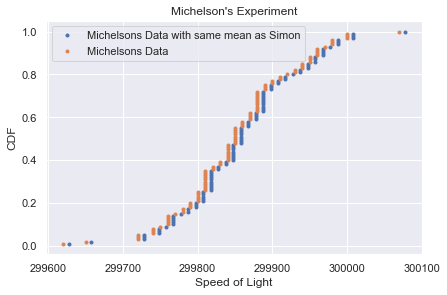

In [972]:
shifted_michelson_speed_of_light = michelson_speed_of_light - np.mean(michelson_speed_of_light) + simon_newcomb_mean_speed_light
x,y = ecdf(shifted_michelson_speed_of_light)
xx,yy = ecdf(michelson_speed_of_light)
plt.plot(x,y,marker='.', linestyle='none',label='Michelsons Data with same mean as Simon')
plt.plot(xx,yy,marker='.', linestyle='none',label='Michelsons Data')
_=plt.xlabel('Speed of Light')
_=plt.ylabel('CDF')
_=plt.title("Michelson's Experiment")
_=plt.legend()

<b> Test Statistic :</b> Mean of Bootstraped Sample - Simon's Mean

In [974]:
def diff_from_simon(data,simon_newcomb_mean_speed_light = 299860):
    return np.mean(data-simon_newcomb_mean_speed_light)

In [976]:
diff_obs  = diff_from_simon(michelson_speed_of_light)

In [977]:
diff_obs

-7.6

In [981]:
bs_replicates  = draw_bs_reps(shifted_michelson_speed_of_light,diff_from_simon,10000 )
p_value = np.sum(bs_replicates<=diff_obs) / 10000  #Less than Since Michelson's mean was less than Simon's mean
p_value

0.1691

##### ONE SAMPLE TEST Example:2 "Frog Impact Force"

In [999]:
frog_force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [1000]:
np.mean(frog_force_b)

0.4191000000000001

 <b> Frog C: </b>  Mean Impact Force =  0.55 N (DataSet Not Available)

<b> TO TEST: </b> The mean strike force of Frog B is equal to that of Frog C ???
<br><br>
<b> GOAL </b> :  Goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [1001]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = frog_force_b - np.mean(frog_force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(frog_force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0043


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

##### TWO sample Test "Frog Impact Force"
Compare two sets of Data

<b> TO TEST </b> :  Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

In [1003]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [1006]:
forces_concat = np.concatenate((force_a,force_b))

In [1008]:
empirical_diff_means = np.mean(force_a) - np.mean(force_b)

In [1009]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0044


## Hypothesis test examples

### A/B Testing

To check if a strategy gives a better result
<br>
Eg: Website Redesign
<br><br>
<b> NULL HYPOTHESIS </b>: Test Statistic is Impervious to the Change
<br>
<b> Low p-value </b> : Change in Strategy led to chnage in performance

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [1011]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

A time-on-website analog
It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

Since you will be using your draw_perm_reps() function in this exercise, it may be useful to remind yourself of its call signature: draw_perm_reps(d1, d2, func, size=1) or even referring back to the chapter 3 exercise in which you defined it.

In [1017]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [1019]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,
                                 diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

### Hypothesis test of Correlation

<b> Null Hypothesis </b> : There is no correlation between two variables
<br>
- Simulate Data assuming null hypothesis is true
- Use Pearson Correlation Coefficient ($\rho$)  as a test statistic
- p-vlaue = Fraction of replicates that have $\rho$  at least as large as observed

Simulating a null hypothesis concerning correlation
The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to do it?

Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.

Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [1021]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [1023]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illitracy,fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illitracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted,fertility)

# Compute p-value: p
p = np.sum(perm_replicates >=r_obs) / 10000
print('p-val =', p)

NameError: name 'illitracy' is not defined

Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [1025]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])
treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

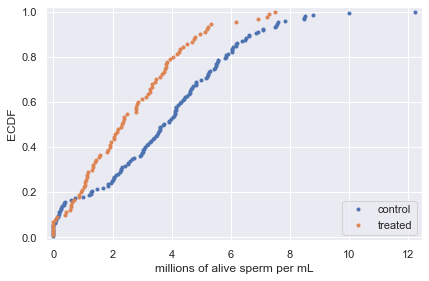

In [1026]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [1030]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0001


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed

## Case Study

### Data

https://datadryad.org/stash/dataset/doi:10.5061/dryad.g6g3h

- 2 Main Bird Species in an isolated Island Have been monitored

In [2]:
##data
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv"
s=requests.get(url).content
finch_1975=pd.read_csv(io.StringIO(s.decode('utf-8')))

url1="https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv"
ss=requests.get(url1).content
finch_2012=pd.read_csv(io.StringIO(ss.decode('utf-8')))

url2="https://assets.datacamp.com/production/repositories/470/datasets/7ff772e1f4e99ed93685296063b6e604a334236d/scandens_beak_depth_heredity.csv"
s1=requests.get(url2).content
scandens_beak = pd.read_csv(io.StringIO(s1.decode('utf-8')))

url3="https://assets.datacamp.com/production/repositories/470/datasets/532cb2fecd1bffb006c79a28f344af2290d643f3/fortis_beak_depth_heredity.csv"
s2=requests.get(url3).content
fortis_beak = pd.read_csv(io.StringIO(s2.decode('utf-8')))

In [51]:
scandens_1975_beak_depth = finch_1975[finch_1975['species']=='scandens']['Beak depth, mm'].to_numpy()
scandens_2012_beak_depth = finch_2012[finch_2012['species']=='scandens']['bdepth'].to_numpy()
scan_beak_depth = np.concatenate((scandens_1975_beak_depth, scandens_2012_beak_depth), axis=None)
year = [1975]*scandens_1975_beak_depth.shape[0] + [2012]*scandens_2012_beak_depth.shape[0]
year = np.array(year)
scandens_beak_depth = pd.DataFrame({'beak_depth':scan_beak_depth,'year':year})
scandens_beak_depth.head(2)

,beak_depth,year
0,8.4,1975
1,8.8,1975


### EDA

#### Swarm Plot

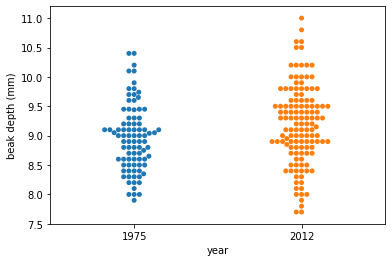

In [55]:
# Create bee swarm plot
import seaborn as sns
_ = sns.swarmplot(data=scandens_beak_depth, x='year', y='beak_depth')
# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

#### ECDF

In [56]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

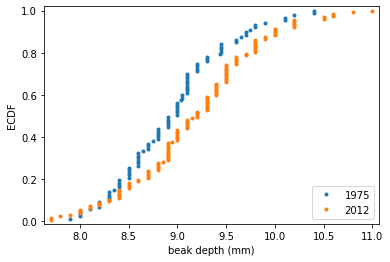

In [58]:
# Compute ECDFs
x_1975, y_1975 = ecdf(scandens_1975_beak_depth)
x_2012, y_2012 = ecdf(scandens_2012_beak_depth)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

- The mean is larger in the 2012 data, and the variance does appear larger as well.

### Parameter estimates of beak depths

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [59]:
# Compute the difference of the sample means
mean_diff = np.mean(scandens_2012_beak_depth) - np.mean(scandens_1975_beak_depth)

- BootStrapping

In [61]:
def bootstrap_replicate(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)

    return bs_replicates

In [62]:
# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(scandens_1975_beak_depth, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(scandens_2012_beak_depth, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.0570029  0.38861311] mm


### Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

- Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.

In [65]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((scandens_1975_beak_depth, scandens_2012_beak_depth)))

- Shift 'scandens_1975_beak_depth' and 'scandens_2012_beak_depth' such that their means are equal to the one you just computed for the combined data set.

In [66]:
# Shift the samples
bd_1975_shifted = scandens_1975_beak_depth - np.mean(scandens_1975_beak_depth) + combined_mean
bd_2012_shifted = scandens_2012_beak_depth - np.mean(scandens_2012_beak_depth) + combined_mean

- Take 10,000 bootstrap replicates of the mean each for the 1975 and 2012 beak depths.

In [67]:
# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

- Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference.

In [69]:
# Compute the difference of the sample means
mean_diff = np.mean(scandens_2012_beak_depth) - np.mean(scandens_1975_beak_depth)

In [71]:
# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0045


We get a p-value of 0.0045, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### Beak Shape

In [88]:
##DATA##
scandens_1975_beak_length = finch_1975[finch_1975['species']=='scandens']['Beak length, mm'].to_numpy()
scandens_2012_beak_length = finch_2012[finch_2012['species']=='scandens']['blength'].to_numpy()
scan_beak_length = np.concatenate((scandens_1975_beak_length, scandens_2012_beak_length), axis=None)
year1 = [1975]*scandens_1975_beak_length.shape[0] + [2012]*scandens_2012_beak_length.shape[0]
year1 = np.array(year1)
scandens_beak_length = pd.DataFrame({'beak_length':scan_beak_length,'year':year1, 'beak_depth':scan_beak_depth})
scandens_beak_length.head(2)

,beak_length,year,beak_depth
0,13.9,1975,8.4
1,14.0,1975,8.8


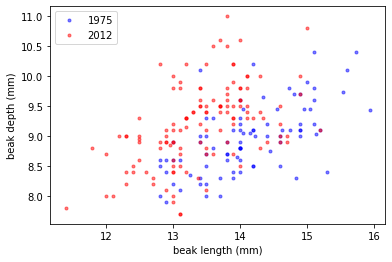

In [89]:
# Make scatter plot of 1975 data
_ = plt.plot(scandens_beak_length[scandens_beak_length['year']==1975]['beak_length'], scandens_beak_length[scandens_beak_length['year']==1975]['beak_depth'], marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(scandens_beak_length[scandens_beak_length['year']==2012]['beak_length'], scandens_beak_length[scandens_beak_length['year']==2012]['beak_depth'], marker='.',
             linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')


-  we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

<b> Performing Linear Regression: </b> 

In [101]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [103]:
bl_1975 = scandens_beak_length[scandens_beak_length['year']==1975]['beak_length'].to_numpy()
bl_2012 = scandens_beak_length[scandens_beak_length['year']==2012]['beak_length'].to_numpy()

bd_1975 = scandens_beak_length[scandens_beak_length['year']==1975]['beak_depth'].to_numpy()
bd_2012 = scandens_beak_length[scandens_beak_length['year']==2012]['beak_depth'].to_numpy()

In [104]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

In [105]:
# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

In [106]:
# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33863131 0.59398681]
1975: intercept = 2.3908752365842267 conf int = [0.56909307 4.1717309 ]
2012: slope = 0.462630358835313 conf int = [0.32939381 0.60280563]
2012: intercept = 2.9772474982360198 conf int = [1.13314277 4.76677928]


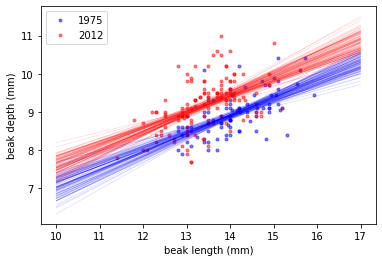

In [108]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],  #y=mx+c
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')


- The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

<b> Beak length to depth ratio </b>

In [109]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

- Compute the mean of the length to depth ratio for 1975 and for 2012:

In [110]:
# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

- Generate 10,000 bootstrap replicates each for the mean ratio for 1975 and 2012 using your draw_bs_reps() function

In [111]:
# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

In [112]:
# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55658118 1.60130821]
2012: mean ratio = 1.4658342276847767 conf int = [1.44401497 1.48817127]


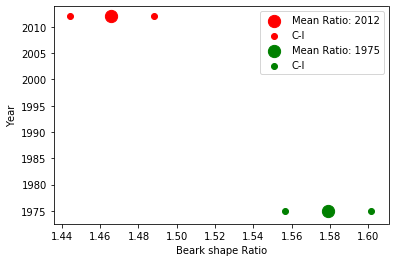

In [155]:
plt.scatter(mean_ratio_2012,2012, c='r',s=150, label='Mean Ratio: 2012')
plt.scatter(conf_int_2012[0],2012, c='r', label='C-I')
plt.scatter(conf_int_2012[1],2012, c='r')


plt.scatter(mean_ratio_1975,1975, c='g',s=150, label='Mean Ratio: 1975')
plt.scatter(conf_int_1975[0],1975, c='g', label='C-I')
plt.scatter(conf_int_1975[1],1975, c='g')

_ = plt.xlabel('Beark shape Ratio')
_ = plt.ylabel('Year')
_ = plt.legend(loc='upper right')

- The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

###  Calculation of Heritability

- Why do some birds have learg beaks?

- 'Scandens' species mates with 'fortis' species, giving rise to hybrid birds
- These hybrid birds mate with pure 'scandens' (Introgressive Hybridization), which brings 'fortis' characteristic into 'scandens' species

<b> How strongly parental traints are pased onto offsprings?</b> 

- Extent to which parental beak depth is inherited in both 'scandens' and 'fortis'

Average beak depth (in mm) of two parents of the species:

In [163]:
bd_parent_scandens = np.array([ 8.3318,  8.4035,  8.5317,  8.7202,  8.7089,  8.7541,  8.773 ,
        8.8107,  8.7919,  8.8069,  8.6523,  8.6146,  8.6938,  8.7127,
        8.7466,  8.7504,  8.7805,  8.7428,  8.7164,  8.8032,  8.8258,
        8.856 ,  8.9012,  8.9125,  8.8635,  8.8258,  8.8522,  8.8974,
        8.9427,  8.9879,  8.9615,  8.9238,  8.9351,  9.0143,  9.0558,
        9.0596,  8.9917,  8.905 ,  8.9314,  8.9465,  8.9879,  8.9804,
        9.0219,  9.052 ,  9.0407,  9.0407,  8.9955,  8.9992,  8.9992,
        9.0747,  9.0747,  9.5385,  9.4781,  9.4517,  9.3537,  9.2707,
        9.1199,  9.1689,  9.1425,  9.135 ,  9.1011,  9.1727,  9.2217,
        9.2255,  9.2821,  9.3235,  9.3198,  9.3198,  9.3198,  9.3273,
        9.3725,  9.3989,  9.4253,  9.4593,  9.4442,  9.4291,  9.2632,
        9.2293,  9.1878,  9.1425,  9.1275,  9.1802,  9.1765,  9.2481,
        9.2481,  9.1991,  9.1689,  9.1765,  9.2406,  9.3198,  9.3235,
        9.1991,  9.2971,  9.2443,  9.316 ,  9.2934,  9.3914,  9.3989,
        9.5121,  9.6176,  9.5535,  9.4668,  9.3725,  9.3348,  9.3763,
        9.3839,  9.4216,  9.4065,  9.3348,  9.4442,  9.4367,  9.5083,
        9.448 ,  9.4781,  9.595 ,  9.6101,  9.5686,  9.6365,  9.7119,
        9.8213,  9.825 ,  9.7609,  9.6516,  9.5988,  9.546 ,  9.6516,
        9.7572,  9.8854, 10.0023,  9.3914])

In [164]:
bd_parent_fortis = np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  ,
        9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  ,
       10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  ,
        8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 ,
        9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  ,
       10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  ,
        9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 ,
        9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 ,
       10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 ,
       10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625,
        9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 ,
        9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 ,
        9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 ,
        9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   ,
        9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  ,
        9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  ,
        9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 ,
        9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 ,
       10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775,
        9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025,
        8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
       10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  ,
        9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  ,
        8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 ,
        8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  ,
        9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 ,
       10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775,
        9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 ,
        9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 ,
       10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  ,
        8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 ,
        8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   ,
        9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 ,
        9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 ,
        8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 ,
        9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825,
        9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375,
        8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 ,
        9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 ,
        9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  ,
        9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 ,
        9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725,
        8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])

Average beak depth of the offspring of the respective parents:

In [165]:
bd_offspring_fortis = np.array([10.7 ,  9.78,  9.48,  9.6 , 10.27,  9.5 ,  9.  ,  7.46,  7.65,
        8.63,  9.81,  9.4 ,  9.48,  8.75,  7.6 , 10.  , 10.09,  9.74,
        9.64,  8.49, 10.15, 10.28,  9.2 , 10.01,  9.03,  9.94, 10.5 ,
        9.7 , 10.02, 10.04,  9.43,  8.1 ,  9.5 ,  9.9 ,  9.48, 10.18,
       10.16,  9.08, 10.39,  9.9 ,  8.4 , 10.6 ,  8.75,  9.46,  9.6 ,
        9.6 ,  9.95, 10.05, 10.16, 10.1 ,  9.83,  9.46,  9.7 ,  9.82,
       10.34,  8.02,  9.65,  9.87,  9.  , 11.14,  9.25,  8.14, 10.23,
        8.7 ,  9.8 , 10.54, 11.19,  9.85,  8.1 ,  9.3 ,  9.34,  9.19,
        9.52,  9.36,  8.8 ,  8.6 ,  8.  ,  8.5 ,  8.3 , 10.38,  8.54,
        8.94, 10.  ,  9.76,  9.45,  9.89, 10.9 ,  9.91,  9.39,  9.86,
        9.74,  9.9 ,  9.09,  9.69, 10.24,  8.9 ,  9.67,  8.93,  9.3 ,
        8.67,  9.15,  9.23,  9.59,  9.03,  9.58,  8.97,  8.57,  8.47,
        8.71,  9.21,  9.13,  8.5 ,  9.58,  9.21,  9.6 ,  9.32,  8.7 ,
       10.46,  9.29,  9.24,  9.45,  9.35, 10.19,  9.91,  9.18,  9.89,
        9.6 , 10.3 ,  9.45,  8.79,  9.2 ,  8.8 ,  9.69, 10.61,  9.6 ,
        9.9 ,  9.26, 10.2 ,  8.79,  9.28,  8.83,  9.76, 10.2 ,  9.43,
        9.4 ,  9.9 ,  9.5 ,  8.95,  9.98,  9.72,  9.86, 11.1 ,  9.14,
       10.49,  9.75, 10.35,  9.73,  9.83,  8.69,  9.58,  8.42,  9.25,
       10.12,  9.31,  9.99,  8.59,  8.74,  8.79,  9.6 ,  9.52,  8.93,
       10.23,  9.35,  9.35,  9.09,  9.04,  9.75, 10.5 ,  9.09,  9.05,
        9.54,  9.3 ,  9.06,  8.7 ,  9.32,  8.4 ,  8.67,  8.6 ,  9.53,
        9.77,  9.65,  9.43,  8.35,  8.26,  9.5 ,  8.6 ,  9.57,  9.14,
       10.79,  8.91,  9.93, 10.7 ,  9.3 ,  9.93,  9.51,  9.44, 10.05,
       10.13,  9.24,  8.21,  8.9 ,  9.34,  8.77,  9.4 ,  8.82,  8.83,
        8.6 ,  9.5 , 10.2 ,  8.09,  9.07,  9.29,  9.1 , 10.19,  9.25,
        8.98,  9.02,  8.6 ,  8.25,  8.7 ,  9.9 ,  9.65,  9.45,  9.38,
       10.4 ,  9.96,  9.46,  8.26, 10.05,  8.92,  9.5 ,  9.43,  8.97,
        8.44,  8.92, 10.3 ,  8.4 ,  9.37,  9.91, 10.  ,  9.21,  9.95,
        8.84,  9.82,  9.5 , 10.29,  8.4 ,  8.31,  9.29,  8.86,  9.4 ,
        9.62,  8.62,  8.3 ,  9.8 ,  8.48,  9.61,  9.5 ,  9.37,  8.74,
        9.31,  9.5 ,  9.49,  9.74,  9.2 ,  9.24,  9.7 ,  9.64,  9.2 ,
        7.5 ,  7.5 ,  8.7 ,  8.31,  9.  ,  9.74,  9.31, 10.5 ,  9.3 ,
        8.12,  9.34,  9.72,  9.  ,  9.65,  9.9 , 10.  , 10.1 ,  8.  ,
        9.07,  9.75,  9.33,  8.11,  9.36,  9.74,  9.9 ,  9.23,  9.7 ,
        8.2 ,  9.35,  9.49,  9.34,  8.87,  9.03,  9.07,  9.43,  8.2 ,
        9.19,  9.  ,  9.2 ,  9.06,  9.81,  8.89,  9.4 , 10.45,  9.64,
        9.03,  8.71,  9.91,  8.33,  8.2 ,  7.83,  7.14,  8.91,  9.18,
        8.8 ,  9.9 ,  7.73,  9.25,  8.7 ,  9.5 ,  9.3 ,  9.05, 10.18,
        8.85,  9.24,  9.15,  9.98,  8.77,  9.8 ,  8.65, 10.  ,  8.81,
        8.01,  7.9 ,  9.41, 10.18,  9.55,  9.08,  8.4 ,  9.75,  8.9 ,
        9.07,  9.35,  8.9 ,  8.19,  8.65,  9.19,  8.9 ,  9.28, 10.58,
        9.  ,  9.4 ,  8.91,  9.93, 10.  ,  9.37,  7.4 ,  9.  ,  8.8 ,
        9.18,  8.3 , 10.08,  7.9 ,  9.96, 10.4 ,  9.65,  8.8 ,  8.65,
        9.7 ,  9.23,  9.43,  9.93,  8.47,  9.55,  9.28,  8.85,  8.9 ,
        8.75,  8.63,  9.  ,  9.43,  8.28,  9.23, 10.4 ,  9.  ,  9.8 ,
        9.77,  8.97,  8.37,  7.7 ,  7.9 ,  9.5 ,  8.2 ,  8.8 ])

In [166]:
bd_offspring_scandens = np.array([ 8.419 ,  9.2468,  8.1532,  8.0089,  8.2215,  8.3734,  8.5025,
        8.6392,  8.7684,  8.8139,  8.7911,  8.9051,  8.9203,  8.8747,
        8.943 ,  9.0038,  8.981 ,  9.0949,  9.2696,  9.1633,  9.1785,
        9.1937,  9.2772,  9.0722,  8.9658,  8.9658,  8.5025,  8.4949,
        8.4949,  8.5633,  8.6013,  8.6468,  8.1532,  8.3734,  8.662 ,
        8.6924,  8.7456,  8.8367,  8.8595,  8.9658,  8.9582,  8.8671,
        8.8671,  8.943 ,  9.0646,  9.1405,  9.2089,  9.2848,  9.3759,
        9.4899,  9.4519,  8.1228,  8.2595,  8.3127,  8.4949,  8.6013,
        8.4646,  8.5329,  8.7532,  8.8823,  9.0342,  8.6392,  8.6772,
        8.6316,  8.7532,  8.8291,  8.8975,  8.9734,  9.0494,  9.1253,
        9.1253,  9.1253,  9.1785,  9.2848,  9.4595,  9.3608,  9.2089,
        9.2544,  9.3684,  9.3684,  9.2316,  9.1709,  9.2316,  9.0342,
        8.8899,  8.8291,  8.981 ,  8.8975, 10.4089, 10.1886,  9.7633,
        9.7329,  9.6114,  9.5051,  9.5127,  9.3684,  9.6266,  9.5354,
       10.0215, 10.0215,  9.6266,  9.6038,  9.4063,  9.2316,  9.338 ,
        9.262 ,  9.262 ,  9.4063,  9.4367,  9.0342,  8.943 ,  8.9203,
        8.7835,  8.7835,  9.057 ,  8.9354,  8.8975,  8.8139,  8.8671,
        9.0873,  9.2848,  9.2392,  9.2924,  9.4063,  9.3152,  9.4899,
        9.5962,  9.6873,  9.5203,  9.6646])

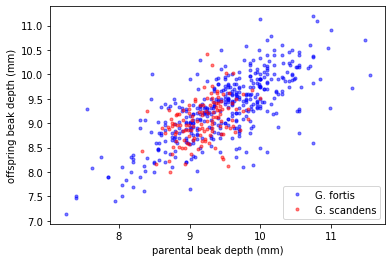

In [167]:
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

-It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. 

<b>  To Quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap. </b>

In [168]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

- Pearson correlation of offspring and parental data:

In [170]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [171]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)
bs_replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.26818376 0.54693101]
G. fortis: 0.7283412395518486 [0.66672934 0.77939157]


- It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

<b> Measuring heritability </b>

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

Write a function heritability(parents, offspring) that computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. Hint: Remind yourself of the np.cov() function we covered in the prequel to this course.
<br><br>
Use this function to compute the heritability for G. scandens and G. fortis.
<br><br>
Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap for G. scandens and G. fortis.
<br><br>
Compute the 95% confidence interval for both using your bootstrap replicates.

In [173]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

In [174]:
# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,
                                     bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,
                                   bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.36039083 0.75377864]
G. fortis: 0.7229051911438155 [0.64759399 0.79765707]


- Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.